# Project: Investigate the TMDB movie dataset

## Table of contents

* [Introduction](#Introduction)
* [Data Wrangling](#Data-Wrangling)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Conclusions](#Conclusion)


## Introduction

### About TMDB
In this notebook, I will investigate the TMDB mavie dataset. The Movie Database (TMDB) is a popular user editable database for movies and TV shows. It has columns for variables such as release year, revenue, budget, director, runtime, and popularity, as well as the IMDB ID for each entry.

### Proposed Questions

1-Which ten directors produce movies more frequently?

2-How did each of the following variables evolve through the years?

  * Average movie popularity
  
  * Average movie rating
  
  * Average runtime
  
  * Average revenue
  
  * Total revenue for movies produced each year
  
  * Number of movies produced
  
3-Which months of the year are more likely to produce more revenue?

4-How is revenue affected by each of the following variables?

  * Budget
  
  * Popularity
  
  * Runtime
  
  * Vote count

<img src="1.jpg" width="800" height="400" align="center"/>

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data-Wrangling

In [2]:
# import our data file into pandas Dataframe

df=pd.read_csv('tmdb-movies.csv')

In [3]:
# checking for columns info and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# checking for null values

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# checking for dupliactes

df.duplicated().any()

True

In [8]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Observation
* The dataset contains 10,866 rows and 21 columns.
* The column data types vary among ints, floats, and objects (i.e. strings).
* There is a duplicated row in the dataset.
* There are columns in the dataset that we don't need for this analysis. We can drop these columns.
* The release_date column has a string data type. It will be more convenient to use it after converting to date-time format.

### Data Cleaning

In [9]:
# Remove the duplicated row

df=df.drop(2090)

In [10]:
# remove the 10 null value rows in the imdb_id column

df=df[df['imdb_id'].notna()]

In [11]:
# checking for the result

df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# Transforming date columns to datetime format

df['release_date']=pd.to_datetime(df['release_date'])
df['release_year']=pd.to_datetime(df['release_year'])

In [13]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09


In [14]:
# Creat two columns one for month name and one for year 

import calendar
df['month']=df['release_date'].dt.month
df['month']=df['month'].apply(lambda x:calendar.month_abbr[x])
df['year']=df['release_date'].dt.year

In [15]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Jun,2015


In [16]:
# remove columns that are not needed to answer the questions

df.drop(['imdb_id', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies'], axis=1, inplace=True)

In [17]:
# Print final columns information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10855 non-null  int64         
 1   popularity    10855 non-null  float64       
 2   budget        10855 non-null  int64         
 3   revenue       10855 non-null  int64         
 4   director      10815 non-null  object        
 5   runtime       10855 non-null  int64         
 6   release_date  10855 non-null  datetime64[ns]
 7   vote_count    10855 non-null  int64         
 8   vote_average  10855 non-null  float64       
 9   release_year  10855 non-null  datetime64[ns]
 10  budget_adj    10855 non-null  float64       
 11  revenue_adj   10855 non-null  float64       
 12  month         10855 non-null  object        
 13  year          10855 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(6), object(2)
memory usage: 1.2+ MB


## Exploratory_Data_Analysis

##### Now that the data is clean, let us start our investigation of the above questions.

### Research Question 1: Which ten directors produce movies more frequently?

In [18]:
Directors=df['director'].value_counts(ascending=False).head(10)
print(Directors)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64


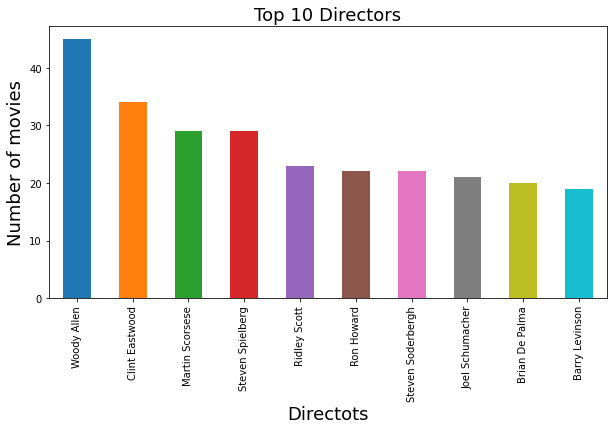

In [19]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Directors.plot.bar(color=colors,figsize=(10,5),title='Top 10 directors');
plt.title('Top 10 Directors',size=18);
plt.xlabel('Directots',size=18);
plt.ylabel('Number of movies',size=18);

Top 10 Directors:
    
1. Woody Allen
2. Clint Eastwood       
3. Martin Scorsese      
4. Steven Spielberg    
5. Ridley Scott         
6. Steven Soderbergh    
7. Ron Howard           
8. Joel Schumacher      
9. Brian De Palma       
10. Barry Levinson       

### Research Question 2 : How did each of the following variables evolve through the years of 2005 to 2015?

* Average movie popularity
* Average movie rating
* Average runtime
* Average revenue
* Total revenue for movies produced each year
* Number of movies produced

In [20]:
df_years=df.sort_values('year',ascending=True)
df_years.head(1)

,id,popularity,budget,revenue,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,year
9949,336,0.306073,0,0,Sergio Leone,157,1971-10-20,71,7.4,1970-01-01 00:00:00.000001971,0.0,0.0,Oct,1971


In [21]:
df2020=df[df['year'].between(2005,2015)]

In [22]:
Average_popularity_change=df2020.groupby('year')['popularity'].mean()
Average_movie_rating=df2020.groupby('year')['vote_average'].mean()
Average_runtime=df2020.groupby('year')['runtime'].mean()
Total_revenue=df2020.groupby('year')['revenue'].sum()
movies_number=df2020.groupby('year')['id'].count()

In [23]:
Average_popularity_change

year
2005    0.628663
2006    0.606371
2007    0.594434
2008    0.584817
2009    0.600810
2010    0.646241
2011    0.675069
2012    0.608829
2013    0.628575
2014    0.888065
2015    1.032126
Name: popularity, dtype: float64

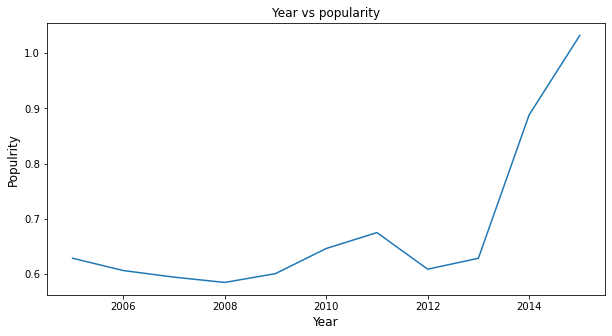

In [24]:
plt.figure(figsize=(10,5));
Average_popularity_change.plot.line('year','popularity');
plt.title('Year vs popularity',size=12);
plt.xlabel('Year',size=12);
plt.ylabel('Populrity',size=12);

#### Popularity started at (0.628663) in 2005 and started to fluctuate along the years until it reached it's higher peak in 2015 with (1.032126)

In [25]:
Average_movie_rating

year
2005    5.866484
2006    5.941422
2007    5.958945
2008    5.930847
2009    5.853672
2010    5.987500
2011    5.958519
2012    5.795392
2013    5.878116
2014    5.919456
2015    5.883121
Name: vote_average, dtype: float64

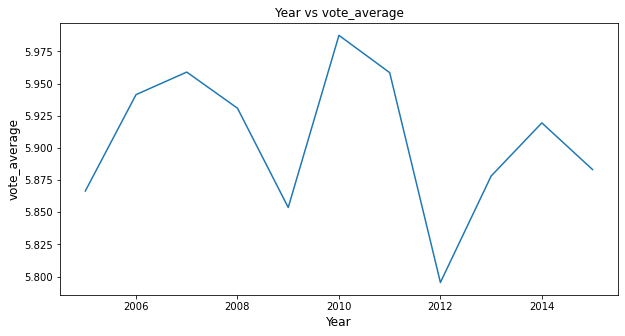

In [26]:
plt.figure(figsize=(10,5));
Average_movie_rating.plot.line('year','vote_average')
plt.title('Year vs vote_average',size=12);
plt.xlabel('Year',size=12);
plt.ylabel('vote_average',size=12);

#### Vote avergae fluctuates over the years it increased from 2006 (5.866484) to 2010 (5.987500) to reach it's highest peack and reduced in 2012 (5.795392) to it's most decrease and it reached  stable area at 2015 (5.883121)

In [27]:
Average_runtime

year
2005    102.686813
2006    101.683824
2007    100.504587
2008    100.280242
2009     98.271186
2010     98.000000
2011     97.922222
2012     97.998294
2013     96.179331
2014     98.409156
2015     96.488854
Name: runtime, dtype: float64

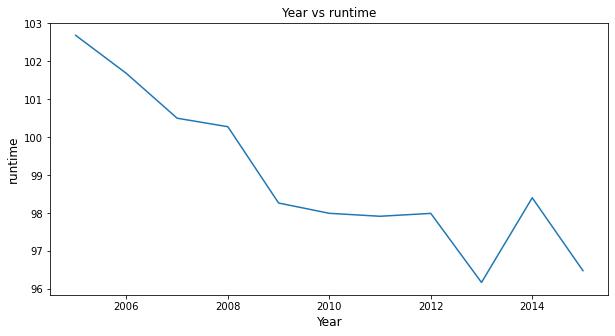

In [28]:
plt.figure(figsize=(10,5));
Average_runtime.plot.line('year','runtime');
plt.title('Year vs runtime',size=12);
plt.xlabel('Year',size=12);
plt.ylabel('runtime',size=12);

#### Runtime started with it's higher at 2006 from (102) min. and decreased until it reached it's lower in 2013 with (96.179331) min. and started to increase in 2014 (98.409156) min. but went back to decrease in 2015 (96.488854) min.

In [29]:
Total_revenue

year
2005    16516835108
2006    16275739385
2007    19411668670
2008    19431695138
2009    22180170559
2010    21959031545
2011    23695591578
2012    24668428824
2013    24703633017
2014    24331150183
2015    26762450518
Name: revenue, dtype: int64

In [30]:
round(1.651684e+10)

16516840000

In [31]:
round(2.676245e+10)

26762450000

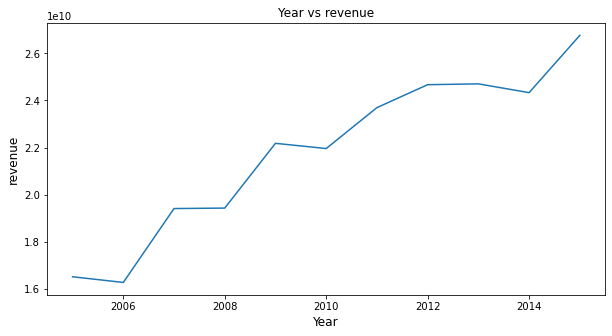

In [32]:
plt.figure(figsize=(10,5));
Total_revenue.plot.line('year','revenue')
plt.title('Year vs revenue',size=12);
plt.xlabel('Year',size=12);
plt.ylabel('revenue',size=12);

#### Revenue increased from 2005 (16516840000) up to reach it's peack in 2015 (26762450000)

In [33]:
movies_number

year
2005    364
2006    408
2007    436
2008    496
2009    531
2010    488
2011    540
2012    586
2013    658
2014    699
2015    628
Name: id, dtype: int64

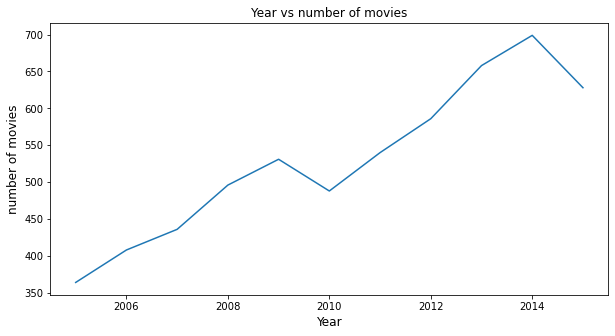

In [34]:
plt.figure(figsize=(10,5));
movies_number.plot.line('year','number of movies');
plt.title('Year vs number of movies',size=12);
plt.xlabel('Year',size=12);
plt.ylabel('number of movies',size=12);

#### Number of movies increased from 2006 with (364) movies up to reaching 2014 (628) movies

### Research Question 3 : Which months of the year are more likely to produce more revenue?

In [35]:
# Aggregate by month and revenue and sort by descending to get the maximum value per month

most_revenue_month=df.groupby('month')['revenue'].sum().sort_values(ascending=False).head(1)
print(most_revenue_month)

month
Jun    61660585217
Name: revenue, dtype: int64


In [36]:
# number rounded up to the next dull int.

round(6.166059e+10)

61660590000

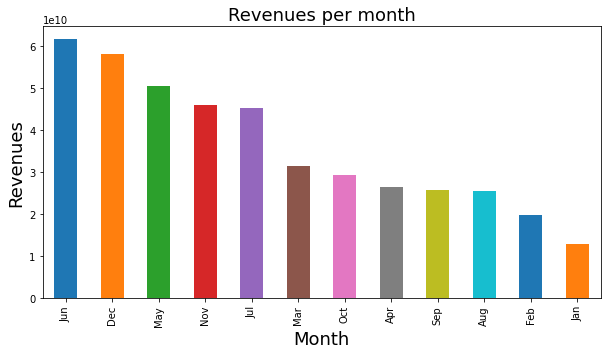

In [37]:
months=df.groupby('month')['revenue'].sum().sort_values(ascending=False)
months.plot.bar('month','reveue',figsize=(10,5),color=colors,title='sum of revenues per months');
plt.title('Revenues per month',size=18);
plt.ylabel('Revenues',size=18);
plt.xlabel('Month',size=18);

#### As per statistics and the bar chart , June is the most month to produce the maximum total revenue along the years with Total revenue of (61660590000)

### Research Question 4 : How is revenue affected by each of the following variables?

1. Budget
2. Popularity
3. Vote count

In [38]:
df.head(1)

,id,popularity,budget,revenue,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,year
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Jun,2015


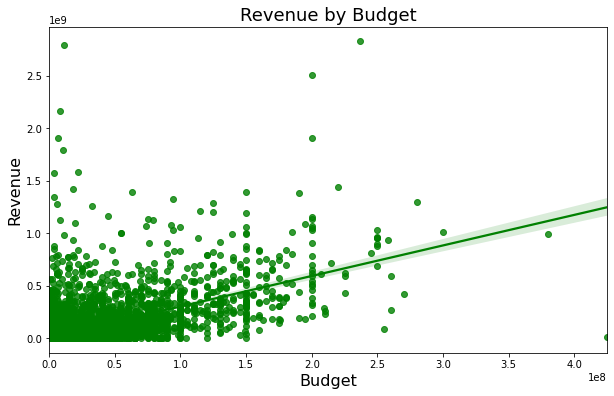

In [39]:
plt.subplots(figsize=(10,6));
sns.regplot(x=df['budget'], y=df['revenue_adj'], color='g');
plt.title('Revenue by Budget',fontsize = 18);
plt.xlabel('Budget',fontsize = 16);
plt.ylabel("Revenue",fontsize = 16);

#### Even though it seems that the revenue is increasing with budget on some level, it is clear that some of the most profitable movies had budgets lower than average

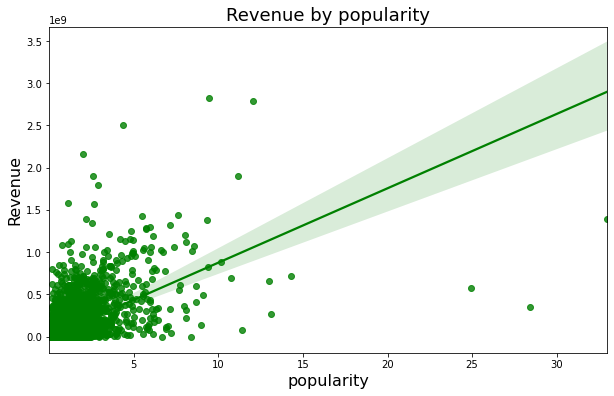

In [40]:
plt.subplots(figsize=(10,6));
sns.regplot(x=df['popularity'], y=df['revenue_adj'], color='g');
plt.title('Revenue by popularity',fontsize = 18);
plt.xlabel('popularity',fontsize = 16);
plt.ylabel("Revenue",fontsize = 16);

#### It seems that more popular movies produce more revenue. However, some popular movies are not necessarily profitable, and vice versa.

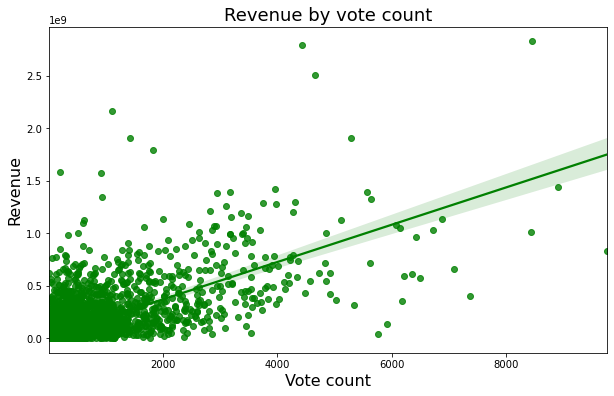

In [41]:
plt.subplots(figsize=(10,6));
sns.regplot(x=df['vote_count'], y=df['revenue_adj'], color='g');
plt.title('Revenue by vote count',fontsize = 18);
plt.xlabel('Vote count',fontsize = 16);
plt.ylabel("Revenue",fontsize = 16);

#### The above plot shows a strong correlation between vote count and revenue, which is intuitive. Sense more revenue means more viewers, it would mean potential voters for the movie.

## Conclusion

### Findings

1- Top 10 Directors:

1- Woody Allen
2- Clint Eastwood
3- Martin Scorsese
4- Steven Spielberg
5- Ridley Scott
6- Steven Soderbergh
7- Ron Howard
8- Joel Schumacher
9- Brian De Palma
10- Barry Levinson

2-  Popularity started at (0.628663) in 2005 and started to fluctuate along the years until it reached it's higher peak in 2015 with (1.032126).

3- Vote avergae fluctuates over the years it increased from 2006 (5.866484) to 2010 (5.987500) to reach it's highest peack and reduced in 2012 (5.795392) to it's most decrease and it reached  stable area at 2015 (5.883121).

4- Runtime started with it's higher at 2006 from (102) min. and decreased until it reached it's lower in 2013 with (96.179331) min. and started to increase in 2014 (98.409156) min. but went back to decrease in 2015 (96.488854) min.

5- Revenue increased from 2005 (16516840000) up to reach it's peack in 2015 (26762450000).

6- Number of movies increased from 2006 with (364) movies up to reaching 2014 (628) movies.

7- As per statistics and the bar chart , June is the most month to produce the maximum total revenue along the years with Total revenue of (61660590000).

8- Even though it seems that the revenue is increasing with budget on some level, it is clear that some of the most profitable movies had budgets lower than average.

9- It seems that more popular movies produce more revenue. However, some popular movies are not necessarily profitable, and vice versa.

10- The above plot shows a strong correlation between vote count and revenue, which is intuitive. Sense more revenue means more viewers, it would mean potential voters for the movie.